In [91]:
from datetime import datetime
import matplotlib.pyplot as plt
from matplotlib import style
from matplotlib.finance import candlestick_ohlc
import matplotlib.dates as mdates
import pandas as pd
import pandas_datareader.data as web
# %matplotlib notebook

In [92]:
style.use('ggplot')

In [93]:
start = datetime(2000,1,1)
end = datetime(2016,12,31)

In [94]:
df = web.DataReader('GOOG', 'yahoo', start, end)

In [95]:
# print(df.head(6))

In [96]:
df.to_csv('goog.csv')
# df = pd.read_csv('tsla.csv', parse_dates=True, index_col=0)
# print(df.head())

<IPython.core.display.Javascript object>


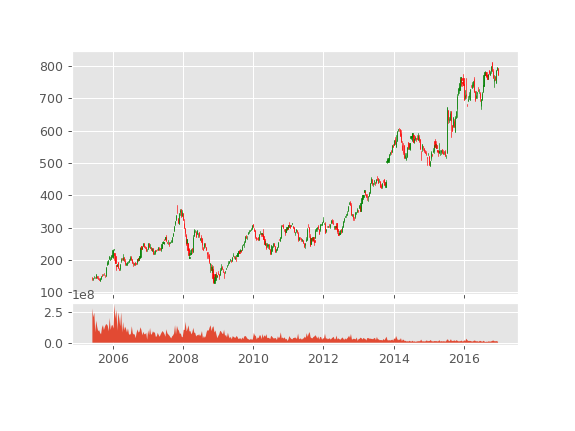

In [115]:
df.plot()
plt.show()

In [119]:
# print(df['Adj Close'].head())
df['Adj Close'].plot()
plt.show()

In [120]:
# Calculate the 100 day moving average
df['100ma'] = df['Adj Close'].rolling(window=100).mean()
# Remove the rows which have NaN inplace
df.dropna(inplace=True)
print(df.head())

                  Open        High         Low       Close   Adj Close  \
Date                                                                     
2005-06-02  143.825912  144.348938  141.768616  143.412460  143.412460   
2005-06-03  142.859528  144.109848  138.187042  139.606720  139.606720   
2005-06-06  140.667740  146.326538  140.388794  144.926773  144.926773   
2005-06-07  147.995270  149.235626  144.607971  146.012711  146.012711   
2005-06-08  145.878220  146.047577  138.480942  139.258026  139.258026   

              Volume       100ma  
Date                              
2005-06-02  36082800  101.459007  
2005-06-03  37705300  101.883416  
2005-06-06  45220600  102.368597  
2005-06-07  48828200  102.855472  
2005-06-08  51594400  103.275050  


In [121]:
ax1 = plt.subplot2grid((6,1), (0,0), rowspan=5, colspan=1)
ax2 = plt.subplot2grid((6,1), (5,0), rowspan=1, colspan=1, sharex=ax1)

In [122]:
# Plot the Adjusted Close as the first graph
ax1.plot(df.index, df['Adj Close'])
# Plot the 100 moving average as the second graph
ax2.plot(df.index, df['100ma'])
# Plot the moving average on the bottom
ax2.bar(df.index, df['Volume'])
plt.show()

In [123]:
df_ohlc = df['Adj Close'].resample('10D').ohlc()
df_volume = df['Volume'].resample('10D').sum()
print(df_ohlc.head())

                  open        high         low       close
Date                                                      
2005-06-02  143.412460  146.012711  139.258026  140.722534
2005-06-12  140.847076  143.382568  136.886917  143.382568
2005-06-22  144.109848  151.482208  144.109848  145.081207
2005-07-02  147.302872  147.561905  145.215698  146.127274
2005-07-12  145.345215  156.383835  145.345215  156.383835


In [124]:
df_ohlc.reset_index(inplace=True)
print(df_ohlc.head())

        Date        open        high         low       close
0 2005-06-02  143.412460  146.012711  139.258026  140.722534
1 2005-06-12  140.847076  143.382568  136.886917  143.382568
2 2005-06-22  144.109848  151.482208  144.109848  145.081207
3 2005-07-02  147.302872  147.561905  145.215698  146.127274
4 2005-07-12  145.345215  156.383835  145.345215  156.383835


In [125]:
# Convert dates into a format which is uderstandable by matplotlib(~700000)
df_ohlc['Date'] = df_ohlc['Date'].map(mdates.date2num)
print(df_ohlc.head())

       Date        open        high         low       close
0  732099.0  143.412460  146.012711  139.258026  140.722534
1  732109.0  140.847076  143.382568  136.886917  143.382568
2  732119.0  144.109848  151.482208  144.109848  145.081207
3  732129.0  147.302872  147.561905  145.215698  146.127274
4  732139.0  145.345215  156.383835  145.345215  156.383835


In [126]:
ax1 = plt.subplot2grid((6,1), (0,0), rowspan=5, colspan=1)
ax2 = plt.subplot2grid((6,1), (5,0), rowspan=1, colspan=1, sharex=ax1)
# This will grab the dates from above and display them as beautiful dates
ax1.xaxis_date()
candlestick_ohlc(ax1, df_ohlc.values, width=2,colorup='g')
ax2.fill_between(df_volume.index.map(mdates.date2num), df_volume.values, 0)
plt.show()